In [1]:
#import zipfile
#with zipfile.ZipFile("/home/dsc/Downloads/CMAPSSData.zip", 'r') as zip_ref:
#    zip_ref.extractall("/home/dsc/Downloads/CMAPSSData")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let's import the dataset containing the training database of the 1st round of unit engines.

In [2]:
df_train_1 = pd.read_csv('/home/dsc/Downloads/CMAPSSData/train_FD001.txt', sep=" ", header=None)

In [3]:
df_train_1.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


As we see, column names are not included, they are referenced as numbers. Helped by available bibliography we know the real names so we proceed to change them.
- First column is "ID" and it refers to the engine unit
- Second column is "Cycle" and it counts the cycle number where the engine is representing the data
- The next 3 columns are the "Operational Settings" and they refer to the flight conditions variation which affect the flight performance
- The last 23 columns refer the "Sensor Measurement" and show the value of the different physical conditions happening inside the engine during the flight cycle

In [4]:
df_train_1.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
           dtype='int64')

In [5]:
list_units_1 = 3
operational_list = []
for n in range(1,list_units_1+1):
    operational = "operarional_setting_" + str(n)
    operational_list.append(operational)
 

In [6]:
list_units_2 = 23
sensor_measurement_list = []
for n in range(1,list_units_2+1):
    sensor = "sensor_measurement_" + str(n)
    sensor_measurement_list.append(sensor)
 

In [7]:
df_train_1.columns = ["ID", "Cycle"] + operational_list + sensor_measurement_list

In [8]:
df_train_1

,ID,Cycle,operarional_setting_1,operarional_setting_2,operarional_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [11]:
df_train_1.isnull().sum()

ID                           0
Cycle                        0
operarional_setting_1        0
operarional_setting_2        0
operarional_setting_3        0
sensor_measurement_1         0
sensor_measurement_2         0
sensor_measurement_3         0
sensor_measurement_4         0
sensor_measurement_5         0
sensor_measurement_6         0
sensor_measurement_7         0
sensor_measurement_8         0
sensor_measurement_9         0
sensor_measurement_10        0
sensor_measurement_11        0
sensor_measurement_12        0
sensor_measurement_13        0
sensor_measurement_14        0
sensor_measurement_15        0
sensor_measurement_16        0
sensor_measurement_17        0
sensor_measurement_18        0
sensor_measurement_19        0
sensor_measurement_20        0
sensor_measurement_21        0
sensor_measurement_22    20631
sensor_measurement_23    20631
dtype: int64

In [12]:
df_train_1[["sensor_measurement_22","sensor_measurement_23"]].value_counts()

Series([], dtype: int64)

In [13]:
df_train_1["sensor_measurement_22"].nunique

<bound method IndexOpsMixin.nunique of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
20626   NaN
20627   NaN
20628   NaN
20629   NaN
20630   NaN
Name: sensor_measurement_22, Length: 20631, dtype: float64>

Also, we see that the last two columns of sensor measurement are entirely NaN values, so we can discard them

In [14]:
df_train_1 = df_train_1.dropna(axis=1)
df_train_1.head()

,ID,Cycle,operarional_setting_1,operarional_setting_2,operarional_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

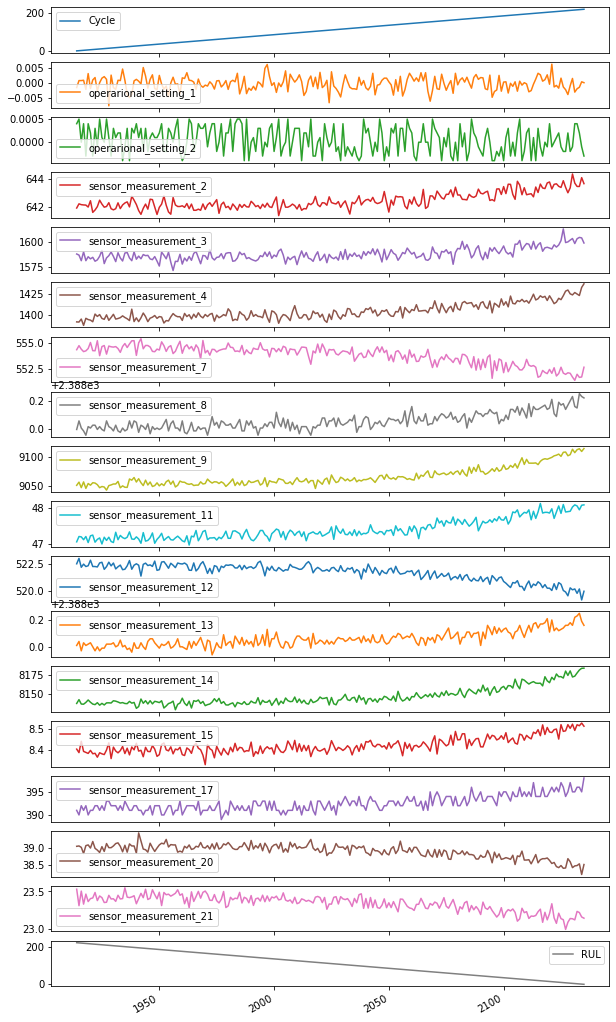

In [65]:
df_train_1[df_train_1.ID == 10].drop(columns="ID").plot(subplots =True, sharex = True, figsize = (10,20))

The variable which will provide the information of the current engine health is the Remaining Useful Life (RUL) which will be different for each engine unit and will decrease after each cycle performed.

This variable represents the number of cycles remaining until the end of life of the engine

In order to calculate we first need to determine the maximum number of cycles achieved by each unit, and then compute a decrease

In [15]:
max_cycle_dataset_1 = df_train_1.groupby(["ID"])["Cycle"].max().reset_index()
max_cycle_dataset_1 = max_cycle_dataset_1.rename(columns={"Cycle":"Max_cycle"})

In [16]:
max_cycle_dataset_1

,ID,Max_cycle
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
...,...,...
95,96,336
96,97,202
97,98,156
98,99,185


We have determined now the maximum number of cycles per engine unit, and also the total number of engines contained in this dataset, 100 units

In [17]:
df_train_1 = df_train_1.merge(max_cycle_dataset_1, how="inner", on="ID")
df_train_1["RUL"] = df_train_1["Max_cycle"] - df_train_1["Cycle"]

df_train_1 = df_train_1.drop(["Max_cycle"],axis=1)
df_train_1.head()

,ID,Cycle,operarional_setting_1,operarional_setting_2,operarional_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


#### Let's have a check of the preliminary dataset to work with

In [20]:
df_train_1.shape

(20631, 27)

The overal dataset comprises 27 diferent variables (26 independent and 1 dependent) and 20631 rows comprising feature values and cycles.

Top 10 max cycles engines from list:

In [21]:
df_train_1[["ID","Cycle"]].groupby("ID").max(["Cycle"]).sort_values(by='Cycle', ascending=False).head(10)

,Cycle
ID,
69,362
92,341
96,336
67,313
83,293
2,287
95,283
64,283
86,278


Average max cycles through engines

Average value for max cycles reached by engines:  206.31


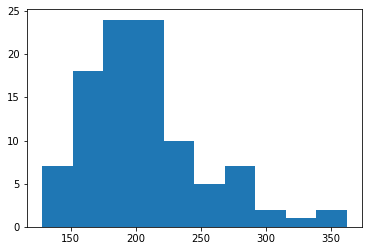

In [22]:
max_cycle_dataset_1 = df_train_1.groupby(["ID"])["Cycle"].max().reset_index()
max_cycle_dataset_1 = max_cycle_dataset_1.rename(columns={"Cycle":"Max_cycle"})
plt.hist(max_cycle_dataset_1["Max_cycle"])
print("Average value for max cycles reached by engines: ", max_cycle_dataset_1["Max_cycle"].mean())

Let's now have a check in the dependant variable, the RUL

Text(0, 0.5, 'Max Cycle')

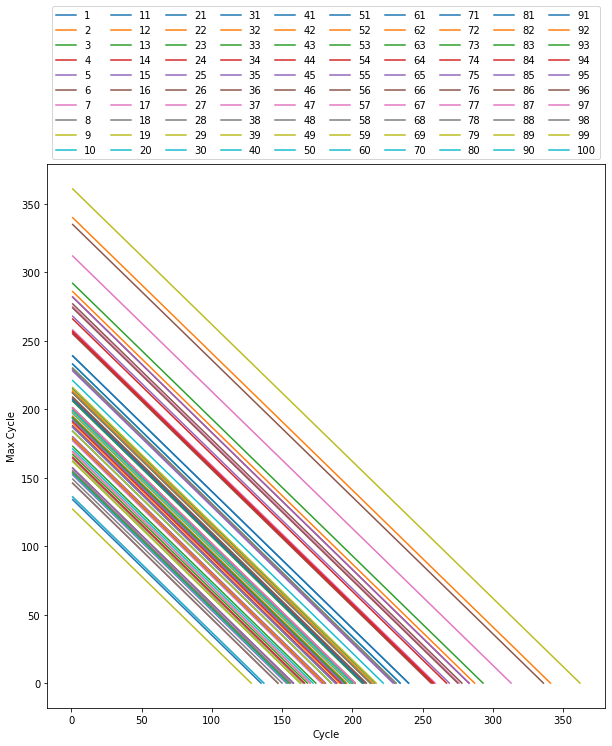

In [23]:
df_RUL_engine_1 = df_train_1[["ID","Cycle","RUL"]]
df_RUL_engine_1 = df_RUL_engine_1.pivot(index='Cycle', columns='ID', values='RUL')

df_RUL_engine_1.plot(figsize=(10, 10))
plt.legend(bbox_to_anchor=(0,1,1,1), loc=3,
       ncol=10, mode="expand")
plt.ylabel("Max Cycle")

We have above a representation of how the engine life for each engine decreases from the cycle 0, where the RUL is maximum, until it reaches RUL = 0 at maximum cycle

#### Let's have a look at the operational settings

In [24]:
df_1_opst_1 = df_train_1[["ID","Cycle","operarional_setting_1"]]
df_1_opst_2 = df_train_1[["ID","Cycle","operarional_setting_2"]]
df_1_opst_3 = df_train_1[["ID","Cycle","operarional_setting_3"]]

df_1_opst_1 = df_1_opst_1.pivot(index='Cycle', columns='ID', values='operarional_setting_1')
df_1_opst_2 = df_1_opst_2.pivot(index='Cycle', columns='ID', values='operarional_setting_2')
df_1_opst_3 = df_1_opst_3.pivot(index='Cycle', columns='ID', values='operarional_setting_3')

Operational setting 1 behavior during cycle evolution per engine unit

Maximum value for operational setting 1:  0.0087 
 Minimum value for operational setting 1:  -0.0087 
 Average value for operational setting 1:  -8.870146866366216e-06


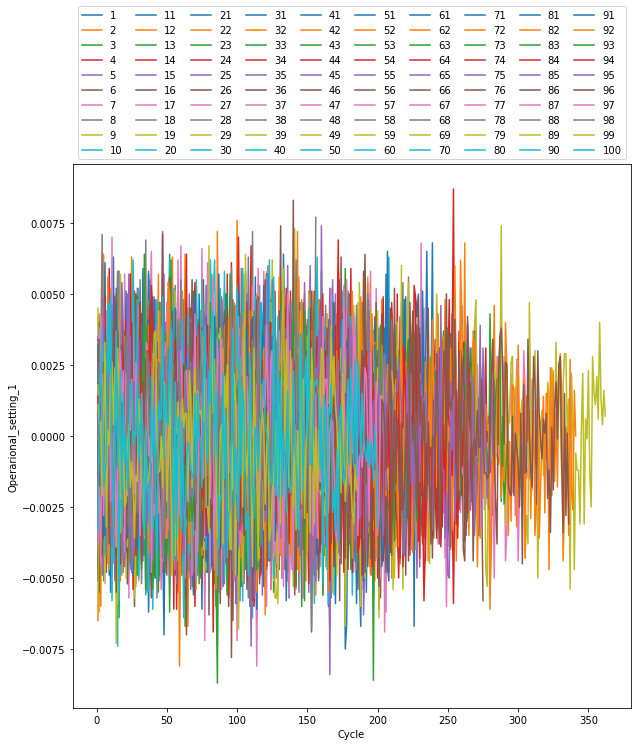

In [25]:
df_1_opst_1.plot(figsize=(10, 10))
plt.legend(bbox_to_anchor=(0,1,1,1), loc=3,
       ncol=10, mode="expand")
plt.ylabel("Operarional_setting_1")

print("Maximum value for operational setting 1: ", df_train_1["operarional_setting_1"].max(),"\n",
     "Minimum value for operational setting 1: " , df_train_1["operarional_setting_1"].min(),"\n",
     "Average value for operational setting 1: " , df_train_1["operarional_setting_1"].mean())

Operational setting 2 behavior during cycle evolution per engine unit

Maximum value for operational setting 2:  0.0006 
 Minimum value for operational setting 2:  -0.0006 
 Average value for operational setting 2:  2.350831273326574e-06


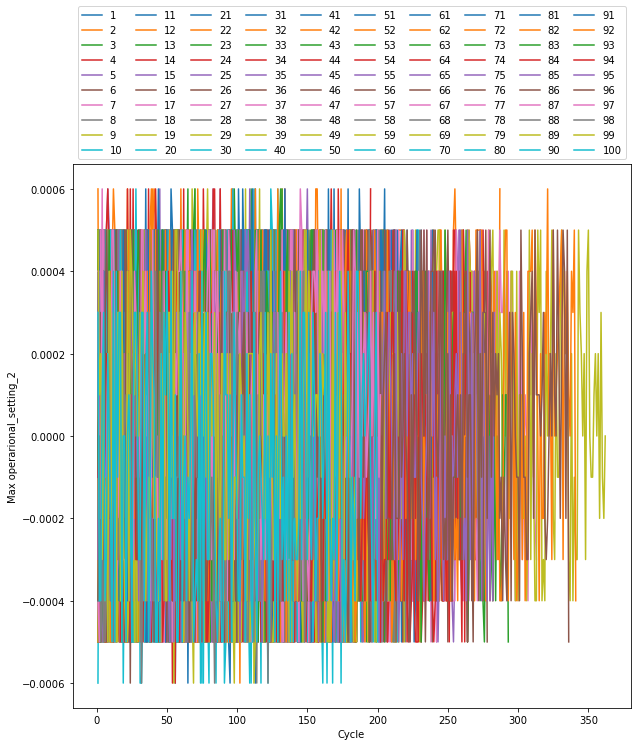

In [26]:
df_1_opst_2.plot(figsize=(10, 10))
plt.legend(bbox_to_anchor=(0,1,1,1), loc=3,
       ncol=10, mode="expand")
plt.ylabel("Max operarional_setting_2")

print("Maximum value for operational setting 2: ", df_train_1["operarional_setting_2"].max(),"\n",
     "Minimum value for operational setting 2: " , df_train_1["operarional_setting_2"].min(),"\n",
     "Average value for operational setting 2: " , df_train_1["operarional_setting_2"].mean())

Operational setting 3 behavior during cycle evolution per engine unit

Maximum value for operational setting 3:  100.0 
 Minimum value for operational setting 3:  100.0 
 Average value for operational setting 3:  100.0


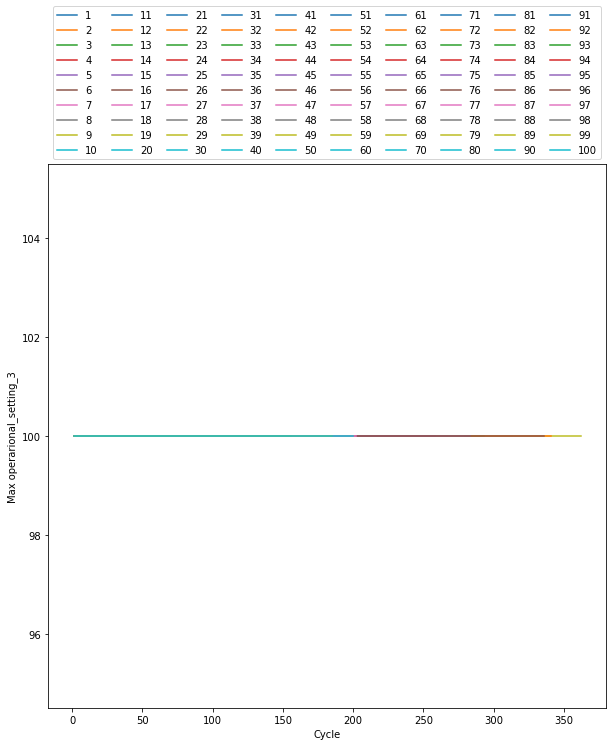

In [27]:
df_1_opst_3.plot(figsize=(10, 10))
plt.legend(bbox_to_anchor=(0,1,1,1), loc=3,
       ncol=10, mode="expand")
plt.ylabel("Max operarional_setting_3")

print("Maximum value for operational setting 3: ", df_train_1["operarional_setting_3"].max(),"\n",
     "Minimum value for operational setting 3: " , df_train_1["operarional_setting_3"].min(),"\n",
     "Average value for operational setting 3: " , df_train_1["operarional_setting_3"].mean())

In [32]:
df_train_1.groupby("ID")["operarional_setting_3"].std().value_counts()

0.0    100
Name: operarional_setting_3, dtype: int64

Operational setting seems to have no changes, so we can discard it from the dataset

In [33]:
df_train_1.drop(columns="operarional_setting_3",axis=1, inplace=True)
df_train_1

,ID,Cycle,operarional_setting_1,operarional_setting_2,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,...,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,RUL
0,1,1,-0.0007,-0.0004,518.67,641.82,1589.70,1400.60,14.62,21.61,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,518.67,642.15,1591.82,1403.14,14.62,21.61,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,518.67,642.35,1587.99,1404.20,14.62,21.61,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,518.67,642.35,1582.79,1401.87,14.62,21.61,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,518.67,642.37,1582.85,1406.22,14.62,21.61,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,518.67,643.49,1597.98,1428.63,14.62,21.61,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,518.67,643.54,1604.50,1433.58,14.62,21.61,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,518.67,643.42,1602.46,1428.18,14.62,21.61,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,518.67,643.23,1605.26,1426.53,14.62,21.61,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


Let's analyze deeply the operational settings 1 and 2:

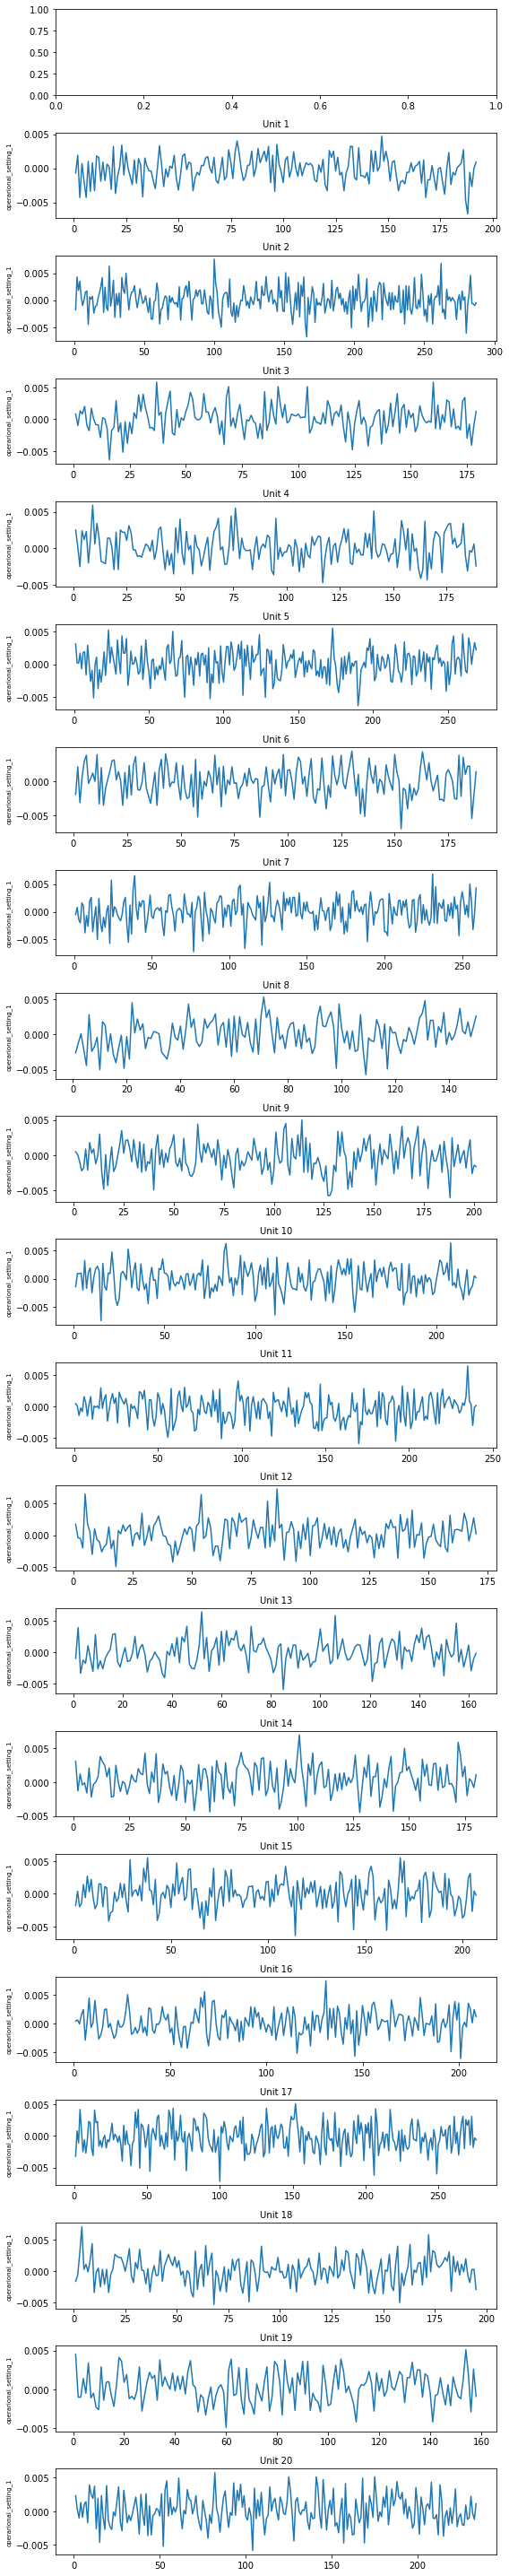

In [37]:


ID_list = df_train_1["ID"].unique()[:20]
fig, ax = plt.subplots(nrows=len(ID_list)+1,  figsize=(8,len(ID_list)*2)) 
for i in ID_list:
    #a trick to get a list of 0 to whatever 
    ids = df_train_1['ID'] == i #filter the dataframe for each item in the list
    
    ax[i].plot(df_train_1.loc[ids]['Cycle'],df_train_1.loc[ids]['operarional_setting_1']) #plotting the filtered dataframe. The brackets make the axis variable dynamic
    
    ax[i].set_title("Unit %i" %i, size=10) #here I am setting the title of each subplot to be the category
    ax[i].set_ylabel('operarional_setting_1', size=7) #setting the ylabel and font size
    
    
    '''
    #Optionally add data labels or text to the subplots
    max_cycle_reached = (df_train_1['Cycle'] == df_train_1['Cycle'].max()) & (df_train_1['ID'] == i) #filter to find the latest data point for the respective country
    max_cycle_ = df_train_1.loc[max_cycle_reached].iloc[0]['operarional_setting_1'] #applying the filter to the dataframe
    ax[i].annotate(str(max_cycle_), xy=(df_train_1['Cycle'].max(),max_cycle_),xycoords = 'data', ha ='left', va='top', fontsize =2) #adding the datapoint to the subplot
    '''
    
    
plt.tight_layout()

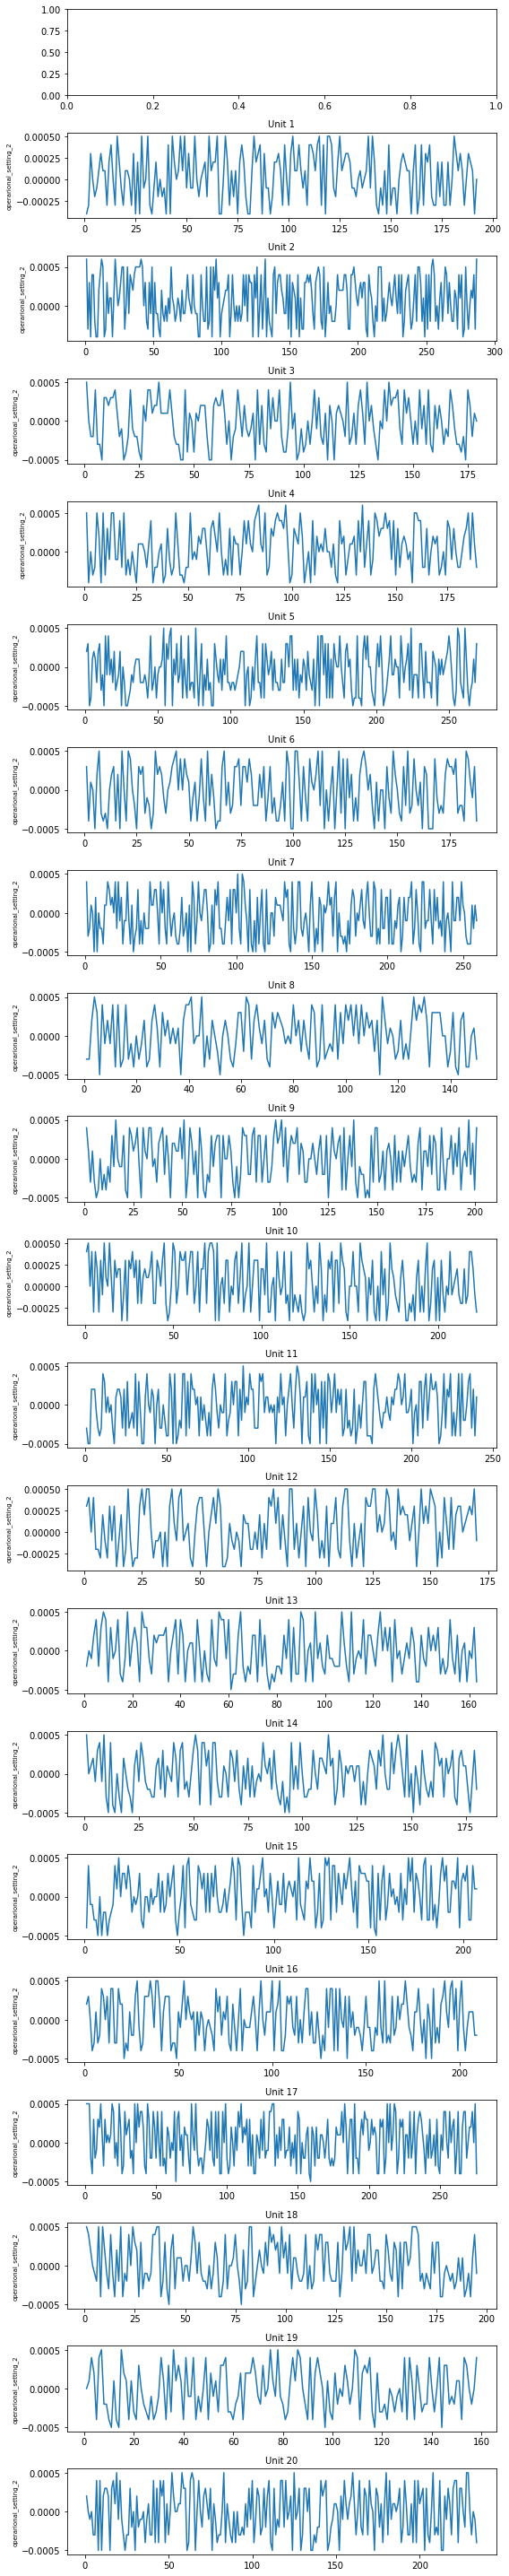

In [36]:
fig, ax = plt.subplots(nrows=len(ID_list)+1,  figsize=(8,len(ID_list)*2)) 
for i in ID_list:
    #a trick to get a list of 0 to whatever 
    filt = df_train_1['ID'] == i #filter the dataframe for each item in the list
    
    ax[i].plot(df_train_1.loc[filt]['Cycle'],df_train_1.loc[filt]['operarional_setting_2']) #plotting the filtered dataframe. The brackets make the axis variable dynamic
    
    ax[i].set_title("Unit %i" %i, size=10) #here I am setting the title of each subplot to be the category
    ax[i].set_ylabel('operarional_setting_2', size=7) #setting the ylabel and font size
plt.tight_layout()

## Ćomo me puedo quitar la primera gráfica vacía??

### Let's check the Sensor Measurements

Write the unit engine number to get the sensor measurements: 10


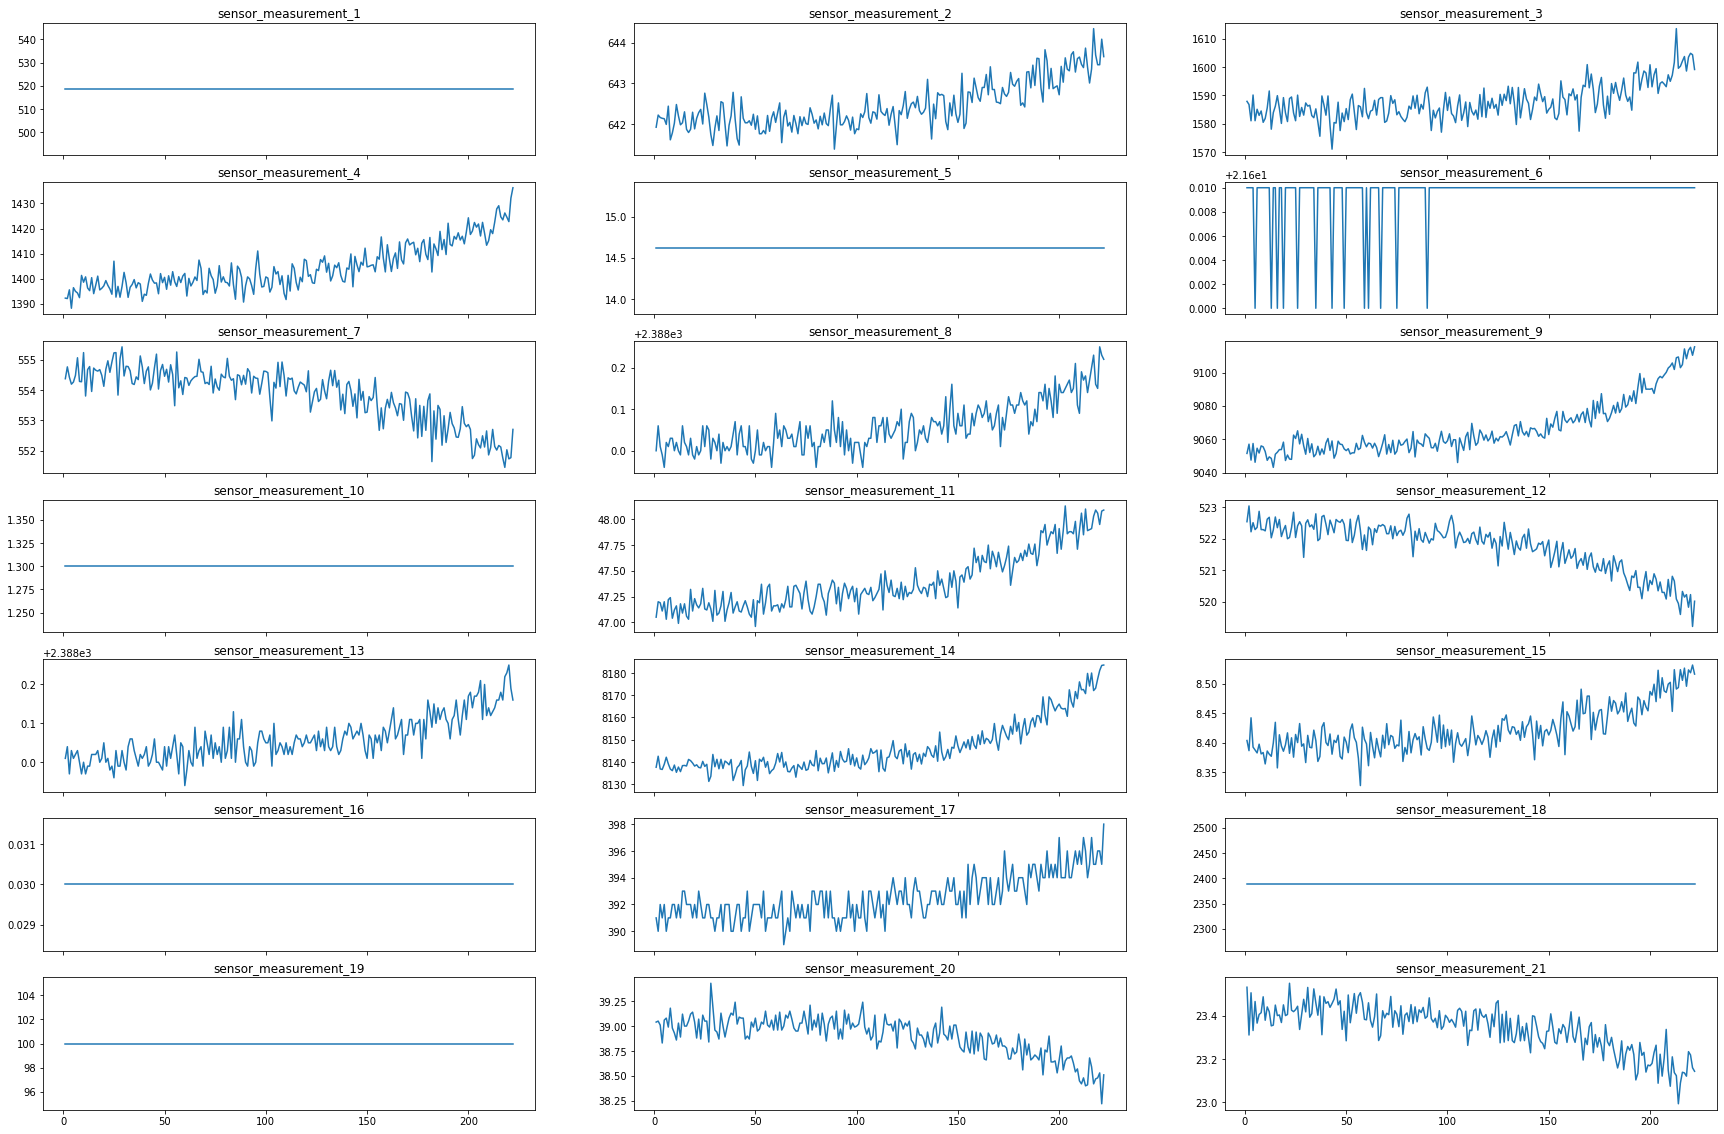

In [38]:
fig,ax=plt.subplots(7,3,figsize=(30,20),sharex=True)

unit = input("Write the unit engine number to get the sensor measurements: ")
df_unit = df_train_1.query("ID==@unit")

contador = 0
for i in range(0,7):
    for j in range(0,3):
        ax[i,j].plot(df_unit["Cycle"], df_unit['sensor_measurement_'+str(contador+1)])
        ax[i,j].set_title('sensor_measurement_'+str(contador+1))
        contador+=1
        
plt.show()

We see there are some sensors which do not reflect any change during the cycles, so we proceed to list them

In [58]:
unit = input("Write the unit engine number to list the sensor measurements: ")
df_unit_n = df_train_1.query("ID==@unit")
filter_col = [col for col in df_train_1 if col.startswith('sensor_measurement_')]
df_unit_n_chosen = df_unit_n[filter_col]

df_unit_n_chosen["Cycle"] = df_unit_n["Cycle"]

df_std = df_unit_n_chosen[df_unit_n_chosen.columns[df_unit_n_chosen.std(axis=0) < 1e-10]]
df_std_list = df_std.columns
print(df_std_list,
     len(df_std_list))

Write the unit engine number to list the sensor measurements: 10
Index(['sensor_measurement_1', 'sensor_measurement_5', 'sensor_measurement_10',
       'sensor_measurement_16', 'sensor_measurement_18',
       'sensor_measurement_19'],
      dtype='object') 6


<ipython-input-58-f9fe64f13c8a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unit_n_chosen["Cycle"] = df_unit_n["Cycle"]


As we have checked, there are some units (entered manually) which some sensor measurements have no variation, hence, we have to investigate if this is something general and discard the variables which do not provide any useful information

In [49]:
print("sensor 1: ", df_train_1["sensor_measurement_1"].value_counts(), "\n",
        "sensor 5: ", df_train_1["sensor_measurement_5"].value_counts(), "\n",
        "sensor 10: ", df_train_1["sensor_measurement_10"].value_counts(), "\n",
        "sensor 16: ", df_train_1["sensor_measurement_16"].value_counts(), "\n",
        "sensor 18: ", df_train_1["sensor_measurement_18"].value_counts(), "\n",
        "sensor 18: ", df_train_1["sensor_measurement_19"].value_counts())

sensor 1:  518.67    20631
Name: sensor_measurement_1, dtype: int64 
 sensor 5:  14.62    20631
Name: sensor_measurement_5, dtype: int64 
 sensor 10:  1.3    20631
Name: sensor_measurement_10, dtype: int64 
 sensor 16:  0.03    20631
Name: sensor_measurement_16, dtype: int64 
 sensor 18:  2388    20631
Name: sensor_measurement_18, dtype: int64 
 sensor 18:  100.0    20631
Name: sensor_measurement_19, dtype: int64


In [52]:
list_units_2 = 21
sensor_measurement_list = []
for n in range(1,list_units_2+1):
    sensor = "sensor_measurement_" + str(n)
    sensor_measurement_list.append(sensor)
    
df_std = df_train_1.groupby(["ID"])[sensor_measurement_list].std()
columns_to_delete = []
for col in df_std:
    if df_std[col].mean()<1e-3:
        columns_to_delete.append(col)
print(columns_to_delete)

['sensor_measurement_1', 'sensor_measurement_5', 'sensor_measurement_6', 'sensor_measurement_10', 'sensor_measurement_16', 'sensor_measurement_18', 'sensor_measurement_19']


In [53]:
df_train_1["sensor_measurement_6"].value_counts()

21.61    20225
21.60      406
Name: sensor_measurement_6, dtype: int64

In [60]:
df_train_1.groupby(["ID"])["sensor_measurement_6"].std()

ID
1      0.000000
2      0.002491
3      0.001482
4      0.000727
5      0.002503
         ...   
96     0.001086
97     0.000993
98     0.001378
99     0.001037
100    0.000997
Name: sensor_measurement_6, Length: 100, dtype: float64

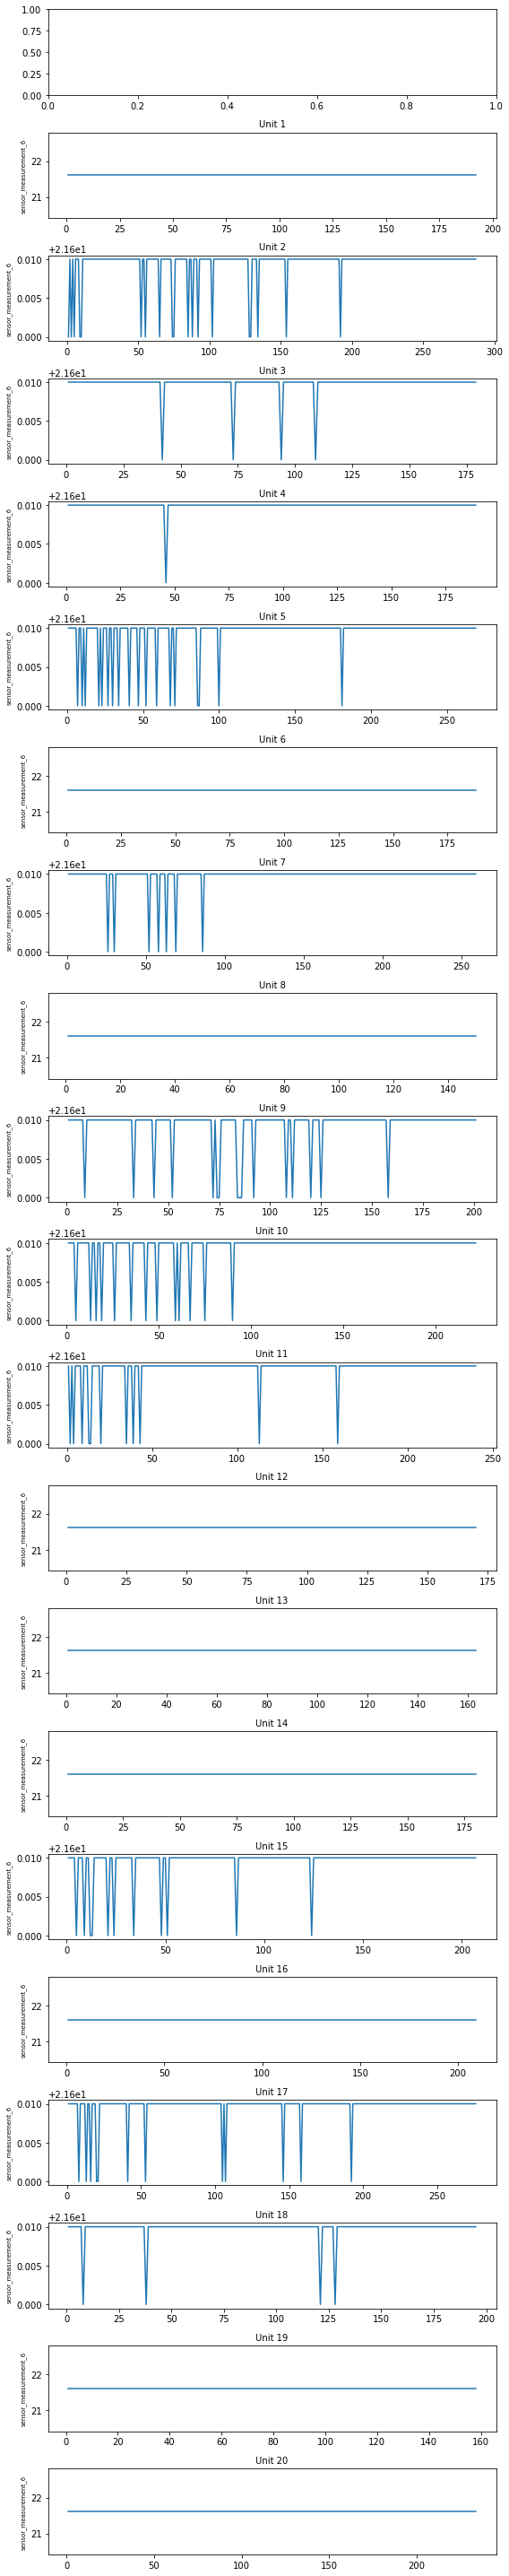

In [61]:
ID_list = df_train_1["ID"].unique()[:20]

fig, ax = plt.subplots(nrows=len(ID_list)+1,  figsize=(8,len(ID_list)*2)) 
for i in ID_list:
    
    filt = df_train_1['ID'] == i #filter the dataframe for each item in the list
    
    ax[i].plot(df_train_1.loc[filt]['Cycle'],df_train_1.loc[filt]['sensor_measurement_6']) #plotting the filtered dataframe. The brackets make the axis variable dynamic
    
    ax[i].set_title("Unit %i" %i, size=10) #here I am setting the title of each subplot to be the category
    ax[i].set_ylabel('sensor_measurement_6', size=7) #setting the ylabel and font size
plt.tight_layout()

We see that in case of sensor measurement 6 the standard deviation is pretty close to zero, but 

In [62]:
df_train_1.drop(columns=columns_to_delete, axis=1, inplace=True)
df_train_1

,ID,Cycle,operarional_setting_1,operarional_setting_2,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_17,sensor_measurement_20,sensor_measurement_21,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

In [72]:
from sklearn.model_selection import train_test_split
data = df_train_1[df_train_1.columns[:-1]]
target = df_train_1[df_train_1.columns[-1:]]
X_train, X_test, y_train, y_test = train_test_split(data, target)

In [73]:
data.shape, target.shape

((20631, 18), (20631, 1))

In [74]:
lr = LinearRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

In [75]:
print(mean_absolute_error(y_test, preds),
      mean_squared_error(y_test, preds),
      explained_variance_score(y_test, preds))

30.536274717373608 1591.7315528374595 0.6695699551662242


In [93]:
lr.score(data,target)

0.6695659609860367

In [94]:
lr.coef_

array([[ 2.79673975e-01, -4.12632602e-01,  4.00497937e+01,
         2.14499401e+03, -6.10762803e+00, -2.54371041e-01,
        -3.98382213e-01,  5.26930473e+00, -2.38192241e+01,
        -2.20357030e-01, -2.38619018e+01,  5.25467094e+00,
        -1.58653086e+01, -2.30778606e-02, -8.77595622e+01,
        -1.11672998e+00,  9.62160948e+00,  1.98401916e+01]])

In [103]:
coefs = lr.coef_.reshape(-1,1)

In [104]:
df_train_1["HI"] = data.dot(coefs)

<AxesSubplot:xlabel='Cycle', ylabel='RUL'>

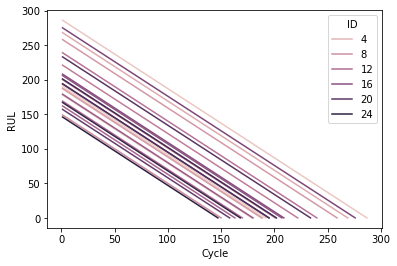

In [96]:
import seaborn as sns
sns.lineplot(data = df_train_1[df_train_1.ID < 25], x="Cycle", y="RUL", hue="ID")

<AxesSubplot:xlabel='Cycle', ylabel='HI'>

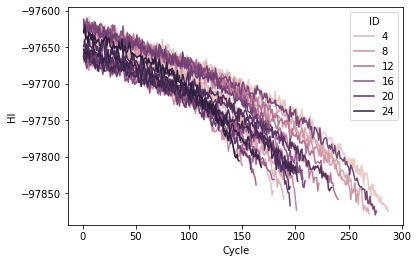

In [105]:
sns.lineplot(data = df_train_1[df_train_1.ID < 25], x="Cycle", y="HI", hue="ID")

## Introduce the test dataset and real RUL

In [79]:
df_test_1 = pd.read_csv('/home/dsc/Downloads/CMAPSSData/test_FD001.txt', sep=" ", header=None)

list_units_1 = 3
operational_list = []
for n in range(1,list_units_1+1):
    operational = "operarional_setting_" + str(n)
    operational_list.append(operational)
list_units_2 = 23

sensor_measurement_list = []
for n in range(1,list_units_2+1):
    sensor = "sensor_measurement_" + str(n)
    sensor_measurement_list.append(sensor)
    
df_test_1.columns = ["ID", "Cycle"] + operational_list + sensor_measurement_list
df_test_1 = df_test_1.dropna(axis=1)


max_cycle_dataset_1 = df_test_1.groupby(["ID"])["Cycle"].max().reset_index()
max_cycle_dataset_1 = max_cycle_dataset_1.rename(columns={"Cycle":"Max_cycle"})
df_test_1 = df_test_1.merge(max_cycle_dataset_1, how="inner", on="ID")
df_test_1["RUL"] = df_test_1["Max_cycle"] - df_test_1["Cycle"]
df_test_1 = df_test_1.drop(["Max_cycle"],axis=1)

df_test_1.drop(columns="operarional_setting_3",axis=1, inplace=True)

df_test_1.drop(columns=columns_to_delete, axis=1, inplace=True)
df_test_1


,ID,Cycle,operarional_setting_1,operarional_setting_2,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_17,sensor_measurement_20,sensor_measurement_21,RUL
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735,30
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916,29
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166,28
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737,27
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,643.24,1599.45,1415.79,553.41,2388.02,9142.37,47.69,520.69,2388.00,8213.28,8.4715,394,38.65,23.1974,4
13092,100,195,-0.0011,-0.0001,643.22,1595.69,1422.05,553.22,2388.05,9140.68,47.60,521.05,2388.09,8210.85,8.4512,395,38.57,23.2771,3
13093,100,196,-0.0006,-0.0003,643.44,1593.15,1406.82,553.04,2388.11,9146.81,47.57,521.18,2388.04,8217.24,8.4569,395,38.62,23.2051,2
13094,100,197,-0.0038,0.0001,643.26,1594.99,1419.36,553.37,2388.07,9148.85,47.61,521.33,2388.08,8220.48,8.4711,395,38.66,23.2699,1


In [92]:
df_rul_1 = pd.read_csv('/home/dsc/Downloads/CMAPSSData/RUL_FD001.txt', sep=" ", header=None)


df_rul_1.dropna(axis=1,inplace=True)
df_rul_1["ID"] = np.arange(1, 101)
df_rul_1.columns = ["RUL", "ID"]
df_rul_1 = df_rul_1[["ID","RUL"]]
df_rul_1

,ID,RUL
0,1,112
1,2,98
2,3,69
3,4,82
4,5,91
...,...,...
95,96,137
96,97,82
97,98,59
98,99,117


We have checked which sensor measurements

In [ ]:
X_1 = df1[df1["ID"]==1]

In [ ]:
X_1 = X_1.drop(["ID"], axis=1)

In [ ]:
X_1

In [ ]:
X = X_1[X_1.columns[:-1]]

In [ ]:
y=X_1.iloc[:,-1].values

In [ ]:
y = X_1[X_1.columns[-1:]]

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
X.shape , y.shape

In [ ]:


lr = LinearRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

In [ ]:
print(mean_absolute_error(y_test, preds),
      mean_squared_error(y_test, preds),
      explained_variance_score(y_test, preds))

In [ ]:
#df1_corr = df1.drop(["ID"], axis=1)
corr = X_1.corr()
corr

In [ ]:
#df1_ID1 = df1_filtered[df1_filtered["ID"]==1]

In [ ]:
corr.style.background_gradient(cmap="coolwarm", vmin=-1, vmax=1).set_precision(2)

In [ ]:
delete_columns = []

for col in X_1.columns:
    corr = X_1[col].corr(X_1["RUL"])
    print(col,"------->",corr)
    if abs(corr) > 0.5:
        pass
    else:
        delete_columns.append(col)

In [ ]:
delete_columns

In [ ]:
df1_filtered = X_1.drop(delete_columns, axis=1)

In [ ]:
df1_filtered

In [ ]:
df1_filtered.to_csv("filtered_Train_001.csv", index=None)

In [ ]:
X = df1_filtered.iloc[:,:-1]
y = df1_filtered.iloc[:,-1]

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
regressor = RandomForestRegressor()

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
y_test, y_pred

In [ ]:
def give_Train_engine(Train_no,engine_id):
    "Train_no, is the Sl.no of Train-set"
    "engine_id, is the ID of engine"
    import pandas as pd
    import numpy as np
    df=df1_no_ID
    train = df[df['ID']==engine_id]
    train = train.drop(columns=['ID'])
    X_train=train.iloc[:,:-1]
    y_train=train.iloc[:,-1]
    return X_train,y_train

In [ ]:
df=df1_no_ID

In [ ]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

In [ ]:
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import *

In [ ]:
y_pred = regressor.predict(X_test)
print('RMSE on Test set:', np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
a,b=250,400
rang = list(range(a,b))
plt.plot(np.array(X_test)[rang,0],y_pred[rang])
plt.plot(np.array(X_test)[rang,0],np.array(y_test)[rang])

plt.ylabel('RUL')
plt.xlabel('CYCLES')
plt.show()